In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Replace 'your_file.csv' with the actual path to your CSV file
csv_file_path = './alphadiversity.csv'
# Read the CSV file into a pandas DataFrame
alpha = pd.read_csv(csv_file_path,sep=',',index_col=0)
alpha.head(5)

,DOL,samples,variable,value,se
1,P11,073B,Chao1,36,0
2,P11,075B,Chao1,29,0
3,P11,081B,Chao1,33,0
4,P11,083B,Chao1,38,0
5,P11,085B,Chao1,28,0


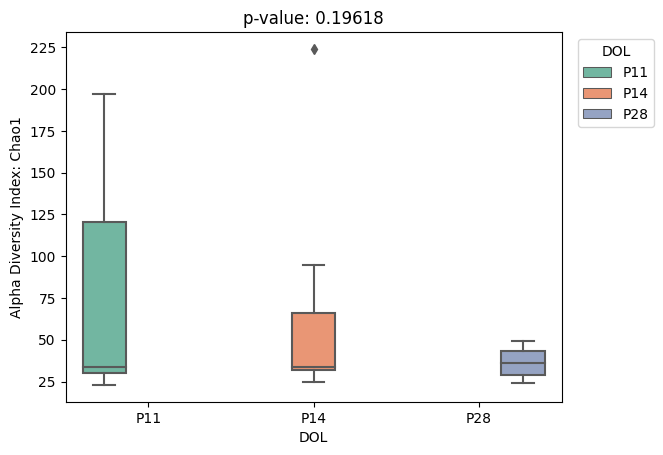

In [52]:
# create grouped boxplot 
sns.boxplot(x = alpha['DOL'],
            y = alpha['value'],
            hue = alpha['DOL'],
            palette = 'Set2')
plt.title('p-value: 0.19618')
plt.xlabel('DOL')
plt.ylabel('Alpha Diversity Index: Chao1')
# Place the legend outside the plot
plt.legend(title='DOL', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()



In [49]:
# Replace 'your_file.csv' with the actual path to your CSV file
beta_csv_file_path = './pcoa_score.csv'
# Read the CSV file into a pandas DataFrame
beta = pd.read_csv(beta_csv_file_path,sep=',',index_col=0)
beta.head(5)


,MDS1,MDS2
073B,-0.66022,0.031441
075B,-0.58367,-0.101970
081B,-0.61334,-0.031245
083B,-0.58410,-0.045257
085B,-0.57132,-0.262110


In [47]:
metadata = pd.read_csv("./11-14-28_TI.csv",sep=',',index_col=0)
metadata.head(5)
grp_meta = []
for i in beta.index:
    for j in metadata.index:
        value = metadata.loc[j, "DOL"]
        if str(i) == str(j):
            grp_meta.append(value)
beta["DOL"] = grp_meta
beta = beta.sort_values(by='DOL', ascending=True)
beta.head(5)

,MDS1,MDS2,DOL
073B,-0.66022,0.031441,P11
075B,-0.58367,-0.101970,P11
107B,-0.66785,-0.108200,P11
106B,-0.58527,0.192650,P11
105B,-0.54663,-0.113250,P11


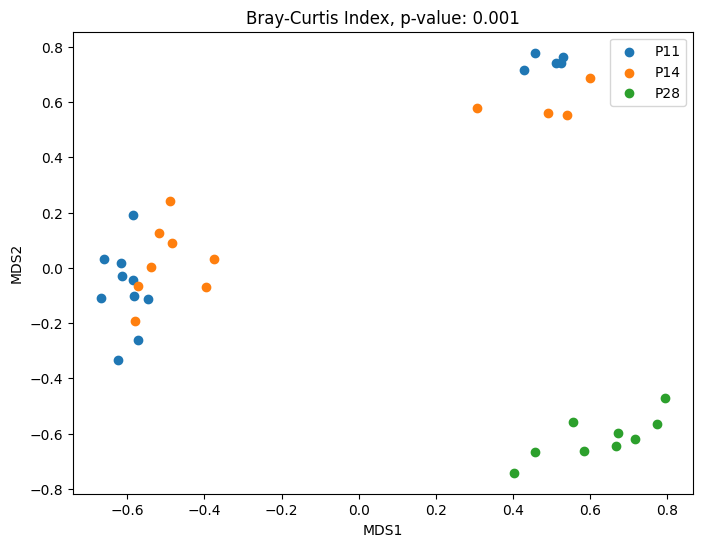

In [48]:
mds1 = beta['MDS1']
mds2 = beta['MDS2']
groups = beta['DOL']
sample_labels = beta.index
plt.figure(figsize=(8, 6))
for group in groups.unique():
    group_indices = groups[groups == group].index
    plt.scatter(mds1[group_indices], mds2[group_indices], label=group)

plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('Bray-Curtis Index, p-value: 0.001')
plt.legend()
plt.grid(False)
plt.show()